<a href="https://colab.research.google.com/github/ellenozores/PredicaoDiabete_RegLog/blob/main/Regress%C3%A3oLog_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predição de diabetes com regressão logística e gradiente descendente

---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
#01: carregar o dataset e visualizar as primeiras linhas
data = pd.read_csv('diabetes.csv')
print("Primeiras Linhas do dataset: ")
print(data.head())

#separar x e y
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

#Padronizar os dados para melhorar a performance do gradiente descendente
scaler = StandardScaler()
X = scaler.fit_transform(X)

Primeiras Linhas do dataset: 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
#02: dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#03: definir as funções
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    epsilon = 1e-5  # Evita log(0)
    cost = -(1/m) * (np.dot(y, np.log(h + epsilon)) + np.dot((1 - y), np.log(1 - h + epsilon)))
    return cost

def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        #mostrar a cada 100 interações
        if i % 100 == 0:
            print(f'Iteração {i}: Custo {cost}')

    return weights, cost_history


In [ ]:
#04: preparar os dados para o modelo
# Adicionar coluna de 1's para o bias
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Inicializar pesos
weights = np.zeros(X_train_bias.shape[1])

# Definir hiperparâmetros
learning_rate = 0.1
iterations = 1000

In [ ]:
#05: Treinar o modelo com gradiente descendente
final_weights, cost_history = gradient_descent(X_train_bias, y_train, weights, learning_rate, iterations)

Iteração 0: Custo 0.6803693136606639
Iteração 100: Custo 0.4797529196432236
Iteração 200: Custo 0.4700130048041901
Iteração 300: Custo 0.46832047506001656
Iteração 400: Custo 0.46794225286414515
Iteração 500: Custo 0.46784844983117624
Iteração 600: Custo 0.4678238832224203
Iteração 700: Custo 0.4678172269531996
Iteração 800: Custo 0.46781537798761486
Iteração 900: Custo 0.4678148533379134


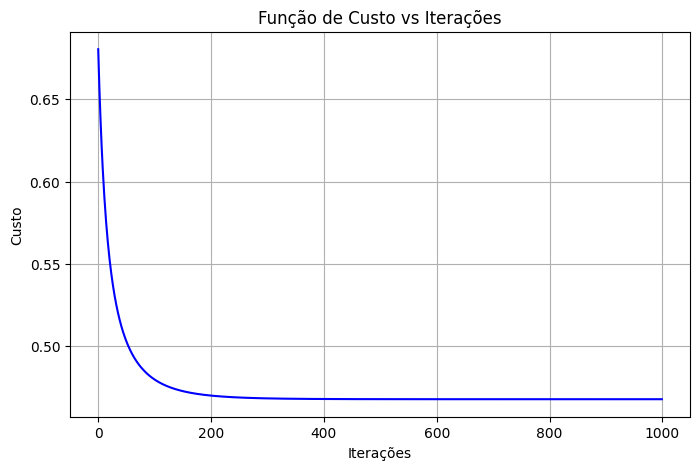

In [ ]:
#06: Visualizar a evolução da função de custo
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), cost_history, color='blue')
plt.title("Função de Custo vs Iterações")
plt.xlabel("Iterações")
plt.ylabel("Custo")
plt.grid(True)
plt.show()

In [ ]:
#07: Fazer previsões no conjunto de teste
y_pred_prob = sigmoid(np.dot(X_test_bias, final_weights))
y_pred = y_pred_prob >= 0.5  # Classificação binária

In [ ]:
#08: Avaliar o modelo com métricas

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
# Precisão
precision = precision_score(y_test, y_pred)
# Recall
recall = recall_score(y_test, y_pred)
# F1-Score
f1 = f1_score(y_test, y_pred)

# Mostrar as métricas
print("\nMétricas do Modelo:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



Métricas do Modelo:
Acurácia: 0.7532
Precisão: 0.6491
Recall: 0.6727
F1-Score: 0.6607


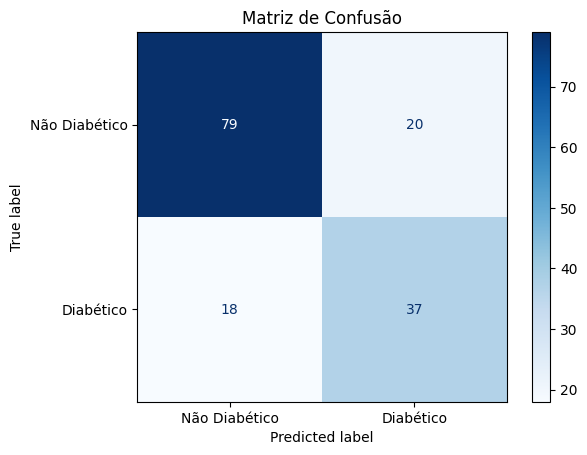

In [ ]:
#09: Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Diabético", "Diabético"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()